# Temat 1 - Boston Housing
## Autor: Mateusz Kołcon

This data frame contains the following columns:

- **crim** - per capita crime rate by town.
- **zn** - proportion of residential land zoned for lots over 25,000 sq.ft.
- **indus** - proportion of non-retail business acres per town.
- **chas** - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **noxv** - nitrogen oxides concentration (parts per 10 million).
- **rm** - average number of rooms per dwelling.
- **age** - proportion of owner-occupied units built prior to 1940.
- **dis** - weighted mean of distances to five Boston employment centres.
- **rad** - index of accessibility to radial highways.
- **tax** - full-value property-tax rate per 10,000 dollars.
- **ptratio** - pupil-teacher ratio by town
- **b (black)** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- **lstat** - lower status of the population (percent).
- **medv** - median value of owner-occupied homes in $1000s.

### Processing

**Zadanie 1 (6ptk)**
Dokonaj podziału danych na zbiór treningowy i test w proporcji 0,75/0,25.

**Zadanie 2 (6ptk)**
Usuń ze zbioru kolumną „Chas”. Dokonaj standaryzacji wszystkich kolumn poza „Medv”

**Zadanie 3 (6ptk)**
Przedstaw w formie heatmapy oraz ramki danych, macierz korelacji dla wszystkich kolumn danych.

### Modelling

**Zadanie 1 (8ptk)**
Przeprowadź regresję z użyciem modelu liniowego. Wskaż zmienne dla których wartość parametru liniowego była najwyższa.

**Zadanie 2 (8ptk)**
Przeprowadź regresję z użyciem sieci neuronowej o 3 warstwach (po trzy neurony w każdej warstwie).

**Zadanie 3 (8ptk)**
Porównaj obydwa modele z użyciem współczynnika R kwadrat.

### Wizualizacja

**Zadanie 1 (7ptk)**
Stwórz wykres rozrzutu reprezentujący relację pomiędzy kolumnami medv i crim. Nałóż na ten wykres linię trendu.

**Zadanie 2 (15ptk)**
Stwórz Dashboard, który będzie zawierał:

    a)	Wykres słupkowy dla parametrów z modelu liniowego
    b)	Histogram dla wybranej kolumny danych
    c)	Wykres rozrzutu dla dowolnej pary kolumn


# 1. Processing

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
import plotly.express as px
from jupyter_dash import JupyterDash
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

In [4]:
df = pd.read_csv('datasets/BostonHousing.csv')
df = df.drop('chas', axis=1)
print('Kształt zbioru danych: ', df.shape)
df.head()

Kształt zbioru danych:  (506, 13)


,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Podzidział na zbiory uczący i treninigowy, normalizacja danych, usuwanie kolumny 'chas'

In [5]:
min_max = MinMaxScaler()

X = df.drop('medv', axis=1)
min_max_X = min_max.fit_transform(X)

X = pd.DataFrame(min_max_X, columns=X.columns)

y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

X_train.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
135,0.006198,0.0,0.785557,0.491770,0.531519,0.981462,0.089216,0.130435,0.477099,0.914894,0.994377,0.420254
480,0.065389,0.0,0.646628,0.302469,0.513700,0.636457,0.208659,1.000000,0.914122,0.808511,1.000000,0.248620
79,0.000872,0.0,0.453446,0.106996,0.443188,0.347065,0.306723,0.173913,0.402672,0.648936,0.997882,0.203366
137,0.003889,0.0,0.785557,0.491770,0.554321,0.983522,0.065491,0.130435,0.477099,0.914894,0.992889,0.354857
176,0.000718,0.0,0.131598,0.257202,0.471163,0.456231,0.220544,0.173913,0.208015,0.425532,0.990746,0.231236


In [6]:
y_train.head()

135    18.1
480    23.0
79     20.3
137    17.1
176    23.2
Name: medv, dtype: float64

### Macierz korelacji

In [7]:
corr_matrix = df.corr()
corr_matrix

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
nox,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
ptratio,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


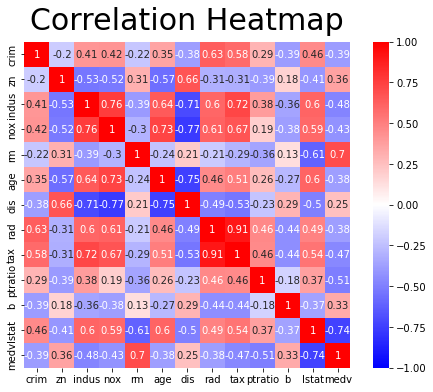

In [8]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, square=True, vmin=-1, vmax=1, annot=True, cmap='bwr', ax=ax)
ax.set_title('Correlation Heatmap', fontdict={'fontsize':30}, pad=12);

# 2. Modelling
## Regresja liniowa

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

coefficients_df = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients_df.columns = ['column','coefficient']

print('Wartości współczynników regresji:')
print(coefficients_df)
print('\nNajważniejsze współczynniki regresji liniowej to:\nlstat: {}\ndis: {}\nrm: {}'.format(coefficients_df[coefficients_df['column'] == 'lstat']['coefficient'].values[0], coefficients_df[coefficients_df['column'] == 'dis']['coefficient'].values[0], coefficients_df[coefficients_df['column'] == 'rm']['coefficient'].values[0]))
print('\nWartość Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('\nWspółczynnik R^2: {}'.format(lr.score(X_test, y_test)))

Wartości współczynników regresji:
     column  coefficient
0      crim   -10.232014
1        zn     5.986104
2     indus     0.351216
3       nox    -9.306308
4        rm    15.453948
5       age     0.995289
6       dis   -19.523547
7       rad     7.693845
8       tax    -7.075806
9   ptratio    -9.497145
10        b     4.134532
11    lstat   -20.791274

Najważniejsze współczynniki regresji liniowej to:
lstat: -20.791274376923877
dis: -19.52354731203767
rm: 15.453947845251847

Wartość Mean Squared Error: 24.32931969320698

Współczynnik R^2: 0.7405997507639333


In [10]:
predictions_df = pd.DataFrame({'Wartość zmierzona':y_test, 'Wartość z modelu':y_pred})
predictions_df = predictions_df.reset_index(drop=True)
predictions_df.head()

,Wartość zmierzona,Wartość z modelu
0,17.8,17.756413
1,21.5,22.937530
2,21.2,22.007250
3,32.4,33.875789
4,10.9,13.872768


## Z wykorzystaniem sieci neuronowej

In [11]:
model = keras.Sequential([
    Dense(3, input_shape=(12,), activation='relu'),
    Dense(3, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-02-02 19:28:41.455765: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-02 19:28:41.455994: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-02-02 19:28:42.054006: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-02 19:28:42.056579: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-02 19:28:42.196757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
12/12 [==============================] - 2s 19ms/step - loss: 580.7551 - val_loss: 625.2205
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 580.1386 - val_loss: 624.6163
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 579.5668 - val_loss: 624.0268
Epoch 4/100
 1/12 [=>............................] - ETA: 0s - loss: 684.9333

2022-02-02 19:28:44.077651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 5ms/step - loss: 578.9821 - val_loss: 623.4003
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 578.3132 - val_loss: 622.6512
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 577.5023 - val_loss: 621.6718
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 576.4431 - val_loss: 620.4160
Epoch 8/100
12/12 [==============================] - 0s 5ms/step - loss: 575.0821 - val_loss: 618.8451
Epoch 9/100
12/12 [==============================] - 0s 5ms/step - loss: 573.3919 - val_loss: 616.9190
Epoch 10/100
12/12 [==============================] - 0s 5ms/step - loss: 571.3461 - val_loss: 614.6089
Epoch 11/100
12/12 [==============================] - 0s 5ms/step - loss: 568.9405 - val_loss: 611.8918
Epoch 12/100
12/12 [==============================] - 0s 5ms/step - loss: 566.1080 - val_loss: 608.7714
Epoch 13/100
12/12 [==============================] - 0s 5ms/step - loss: 562.8702

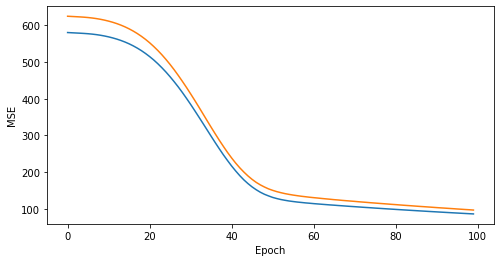

In [12]:
plt.figure(figsize=(8,4))

plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])

In [13]:
y_pred = model.predict(X_test)
y_pred = np.ravel(y_pred)

mse = mean_squared_error(y_test, y_pred)
print('Wartość Mean Squared Error wynosi: ', mse)

print('\nWspółczynnik R^2:', r2_score(y_test,y_pred))

Wartość Mean Squared Error wynosi:  96.48671247725282

Współczynnik R^2: -0.02874546350576268


2022-02-02 19:28:50.904855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [14]:
tf_predictions = pd.DataFrame({'Wartość zmierzona': y_test, 'Wartość z modelu': y_pred})
tf_predictions = tf_predictions.reset_index()
tf_predictions.head()

,index,Wartość zmierzona,Wartość z modelu
0,316,17.8,21.281929
1,218,21.5,20.767962
2,485,21.2,23.787617
3,274,32.4,21.727234
4,427,10.9,18.677803


In [15]:
print('Wartość R^2 z regresji liniowej przy użyciu scikit-learn: ', lr.score(X_test, y_test))
print('Wartość R^2 z sieci neuronowej przy użyciu Tensorflow: ', r2_score(y_test,y_pred)) # Ten wynik mocno różni się przy każdym trenowaniu sieci

Wartość R^2 z regresji liniowej przy użyciu scikit-learn:  0.7405997507639333
Wartość R^2 z sieci neuronowej przy użyciu Tensorflow:  -0.02874546350576268


## Krótki test dla sieci neuronowej składającej się z większej liczby neuronów:

2022-02-02 19:28:51.173427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-02 19:28:52.353149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Wartość Mean Squared Error wynosi:  7.941176164960085

Współczynnik R^2: 0.9153308393989612

Wartość R^2 z regresji liniowej przy użyciu scikit-learn:  0.7405997507639333
Wartość R^2 z sieci neuronowej przy użyciu Tensorflow:  0.9153308393989612


2022-02-02 19:29:28.928305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


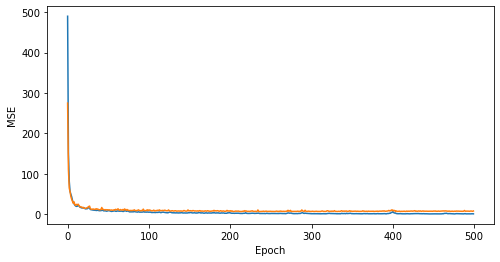

In [16]:
better_model = keras.Sequential([
    Dense(1024, input_shape=(12,), activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

better_model.compile(optimizer='adam', loss='mse')
history = better_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

plt.figure(figsize=(8,4))
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(better_model.history.history['loss'][:])
plt.plot(better_model.history.history['val_loss'][:])

y2_pred = better_model.predict(X_test)
y2_pred = np.ravel(y2_pred)

mse = mean_squared_error(y_test, y2_pred)
print('Wartość Mean Squared Error wynosi: ', mse)

print('\nWspółczynnik R^2:', r2_score(y_test,y2_pred))

print('\nWartość R^2 z regresji liniowej przy użyciu scikit-learn: ', lr.score(X_test, y_test))
print('Wartość R^2 z sieci neuronowej przy użyciu Tensorflow: ', r2_score(y_test,y2_pred))

#### Przykład ten pokazuje, że sieć składająca się z 3 neuronów w 3 warstwach radzi sobie bardzo słabo. Ale jeśli zwiększymy liczbę warstw oraz liczbę neuronów, otrzymamy wynik znacznie przewyższający dokładnością regresję liniową.

# 3. Wizualizacja
## Wykres słupkowy dla parametrów regresji

In [17]:
px.scatter(
    data_frame = df,
    x=df['medv'],
    y=df['crim'],
    trendline="ols",           
).show()

## Dashboard w Dash

In [18]:
fig1 = px.bar(coefficients_df.sort_values(by='coefficient', ascending=False), x='column', y='coefficient', color='coefficient')
fig2 = px.histogram(df['rm'], x='rm', nbins=9)
fig3 = px.scatter(df, x='dis', y='nox', trendline="ols")


app = JupyterDash(__name__)

app.layout = html.Div(children=[
    html.Div([
        html.H1(children='Plotly Dashboard')
    ]),
    html.Div([
        html.H2(children='Wykres współczynników regresji liniowej'),
        html.Div(children='Współczynniki regresji liniowej przedstawione są w kolejności malejącej'),
        dcc.Graph(
            id='graph1',
            figure=fig1
        ),  
    ]),
    html.Div([
        html.H2(children='Histogram dla kolumny "rm"'),
        html.Div(children='Kolumna "rm" zawiera informacje o średniej liczbie pokoi w mieszkaniu w danym regionie.'),
        dcc.Graph(
            id='graph2',
            figure=fig2
        ),  
    ]),
        html.Div([
        html.H2(children='Wykres rozrzutu dla kolumn "dis" i "nox"'),
        html.Div(children='Przedstawia on zależność między średnią odleglością do 5 dużych ośrodków miejskich a stężeniem tlenków azotu. Widać związek między tymi dwoma zmiennymi - im bliższa odległość od dużych ośrodków miejskich, tym większe stężenie tlenków azotu'),
        dcc.Graph(
            id='graph3',
            figure=fig3
        ),  
    ])
])


In [19]:
app.run_server(mode='inline')